<p style="font-size:300%; background-color:gray; color:white; text-align:center;line-height : 80px; margin : 0; padding : 0;">
Tarea 5. Restauración de Imágenes</p>
<p style="font-size:240%; background-color:gray; color:white; text-align:center;line-height : 60px; margin : 0; padding : 0;">
Visión de Máquina</p1>

<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> <br>Jefferson Javier Hernández Panqueba</p>
<p style="font-size:160%; text-align:center; line-height : 20px; margin-top : 0; "> email: jejhernandezpa@unal.edu.co</p>
<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> 
<br>Jaime Andrés Castillo León</p>
<p style="font-size:160%; text-align:center; line-height : 20px; margin-top : 0; "> email:jacastillol@unal.edu.co</p>
<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>05 de Marzo de 2018</p>

<h1 style="font-size:200%; background-color:gray; color:white; text-align:center; line-height : 60px;">
Contenido </h1>

<ul style="font-size:140%; line-height : 25px;">
  <li>Implementar y evaluar el filtro de mediana adaptativa</li>
  <li>Implementar uno de los siguientes filtros:
  <ul>
  <li>Filtro de reachzo de Notch: ideal, Butterworth y Gaussiano</li>
  <li>Filtro de Notch óptimo</li>
</ul>
  </li>
  <li>Evaluar el filtro de Viener para una imagen degradada con un kernel de convolución tipo motion y ademas con ruido aditivo</li>
</ul>


<h1 style="font-size:100%; background-color:rgba(150, 150, 150, 1.0); color:white; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; J.J. Hernández & J.A. Castillo </h1>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
images = ['../tarea01/ABBpicking.jpg',
          '../tarea01/labSIR.jpg',
          '../tarea01/BIOLOIDpostures.jpg',
          '../tarea01/NAOpostures.jpg',
          '../tarea03/evangeline-lilly.jpg',
          '../tarea03/straw.jpg']

im = cv2.imread(images[0],cv2.IMREAD_GRAYSCALE)[0::2,::2]

# plt.imshow(im,cmap='gray',interpolation='none')
# plt.show()

<h1 style="font-size:200%; background-color:gray; color:white; text-align:center; line-height : 60px;">
Filtro Mediana Adaptativo </h1>

<ul style="font-size:140%; line-height : 25px;">
  <li>Los filtros adpatativos cambian su comportamiento basados en las características estadísticas de la imagen dentro de la región local $(S_{xy})$ del filtro, definido por la ventana rectangular $m\times n$.</li>
  <li>$z_{min}$:el mínimo de los niveles de gris en $(S_{xy})$..</li>
  <li>$z_{max}$:el máximo de los niveles de gris en $(S_{xy})$..</li>
  <li>$z_{med}$:el nivel de gris mediana en $(S_{xy})$.</li>
  <li>$z_{xy}$:el nivel de gris en las coordenadas $x,y$.</li>
  <li>$s_{max}$:el máximo tamaño de $(S_{xy})$ permitido </li>
</ul>

<h1 style="font-size:100%; background-color:rgba(150, 150, 150, 1.0); color:white; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; J.J. Hernández & J.A. Castillo </h1>

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:55: RuntimeWarning: overflow encountered in ubyte_scalars


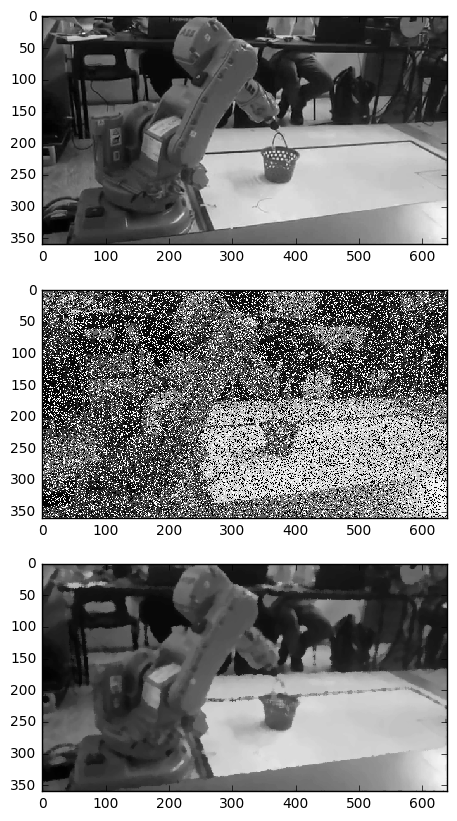

In [3]:
def spatial_filter(img,K):
    imr,imc = img.shape
    new_img = np.zeros_like(img)
    kr,kc = K.shape
    ext_img = cv2.copyMakeBorder(img,(kr-1)/2,(kr-1)/2,(kc-1)/2,(kc-1)/2,cv2.BORDER_REFLECT)
    for i in range(0,imr):
        for j in range(0,imc):
            new_img[i,j] = np.sum(K*ext_img[i:i+kr,j:j+kc])
    return new_img

def spatial_median_filter(img,size=(3,3)):
    imr,imc = img.shape
    new_img = np.zeros_like(img)
    kr,kc = size
    ext_img = cv2.copyMakeBorder(img,(kr-1)/2,(kr-1)/2,(kc-1)/2,(kc-1)/2,cv2.BORDER_REFLECT)
    for i in range(0,imr):
        for j in range(0,imc):
            new_img[i,j] = np.median(ext_img[i:i+kr,j:j+kc])
    return new_img

def spatial_adaptive_local_filter(img,size=(3,3)):
    imr,imc = img.shape
    new_img = np.zeros_like(img)
    kr,kc = size
    ext_img = cv2.copyMakeBorder(img,(kr-1)/2,(kr-1)/2,(kc-1)/2,(kc-1)/2,cv2.BORDER_REFLECT)
    sig2_g = np.var(img-spatial_median_filter(img,size=(kr,kc)))
    for i in range(0,imr):
        for j in range(0,imc):
            sig2_L = np.var(ext_img[i:i+kr,j:j+kc])
            m_L = np.mean(ext_img[i:i+kr,j:j+kc])
            new_img[i,j] = img[i,j]-sig2_g/sig2_L*(img[i,j]-m_L)
    return new_img

def spatial_adaptive_median_filter(img,smax=5):
    imr,imc = img.shape
    new_img = np.zeros_like(img)
    soff = (smax-1)/2
    kr = kc = smax
    ext_img = cv2.copyMakeBorder(img,(kr-1)/2,(kr-1)/2,(kc-1)/2,(kc-1)/2,cv2.BORDER_REFLECT)
    for i in range(0,imr):
        for j in range(0,imc):
            size=3
            while True:
                k=size
                soffxy = (k-1)/2
                Sxy = ext_img[i:i+kr,j:j+kc]
                zmed = np.median(Sxy)
                zmin = np.amin(Sxy)
                zmax = np.amax(Sxy)
                zxy = img[i,j]
                A1 = zmed-zmin
                A2 = zmed-zmax
                if A1>0 and A2<0:
                    B1 = zxy-zmin
                    B2 = zxy-zmax
                    if B1>0 and B2<0:
                        new_img[i,j] = zxy
                        break 
                    else:
                        new_img[i,j] = zmed
                        break 
                else:
                    size = size+2
                    if size > smax:
                        new_img[i,j] = zxy 
                        break 
    return  new_img    

# gaussina noise
#noise = np.random.normal(loc=0,scale=20,size=(im.shape))
#im_noised = im+1.*noise;

# pepper and salt noise
prob = 0.2; rnd = np.random.uniform(size=im.shape)
im_noised = im.copy()
im_noised[rnd < prob] = 0; im_noised[rnd > 1-prob] = 255

# averaging
k = np.ones((3,3))/9
# weighted averaging 3x3
#k = np.ones((3,3)); k[0,1] = k[1,0] = k[2,1] = k[1,2] = 2; k[1,1] = 4; k = k/16;

#new_im = spatial_filter(im_noised,k)
#new_im = spatial_median_filter(im_noised,size=(3,3))
#new_im = spatial_adaptive_local_filter(im_noised,size=(5,5))
new_im = spatial_adaptive_median_filter(im_noised,smax=7)

plt.figure(figsize=(10,10))
plt.subplot(3,1,1),plt.imshow(im,cmap='gray',interpolation='none')
plt.subplot(3,1,2),plt.imshow(im_noised,cmap='gray',interpolation='none')
plt.subplot(3,1,3),plt.imshow(new_im,cmap='gray',interpolation='none')
plt.show()

<h1 style="font-size:200%; background-color:gray; color:white; text-align:center; line-height : 60px;">
Filtro de rechazo Notch: Ideal, Butterworth y gaussiano </h1>

<ul style="font-size:140%; line-height : 25px;">
  <li> La metodología del filtrado de Notch considera a la transformada de Fourier para analizar ruido periodico en la imagen. </li> 
  <li> De forma manual se analiza donde debe ser aplicado un filtro de Notch, para luego superponer todos los filtros que sean necesarios. </li> 
  <li> Se construye los filtros utilizando las funciones de distancia euclidiana sobre el espectro de la imgen. Se implementa para diferentes tipos de perfiles de filtro: Ideal, Butterworth y Gaussiano. </li> 
  <li> Un post-proceso es aplicado a las imagenes después de aplicar el filtro de Notch. Una normalización, una umbralizacion y por ultimo un suavizado. </li>
  <li> Como conclusión, se observa un mejor desempeño en el perfil de Butterworth. El post-proceso es requerido para aclarar la imagen </li>
</ul>

<h1 style="font-size:100%; background-color:rgba(150, 150, 150, 1.0); color:white; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; J.J. Hernández & J.A. Castillo </h1>

In [4]:
# definicion de algunas funciones necesarias: filtros pasa bajos, espectros y aplicacion de filtros a imagenes

# filtros pasa-bajo
def filter_ideal_fcn(H,D,D0,params):
    H[D<=D0] = 1
    return H
def filter_butterworth_fcn(H,D,D0,params=2):
    n = params
    H[:] = 1/(1+np.power(D[:]/D0,2*n))
    return H
def filter_gaussian_fcn(H,D,D0,params=2):
    n = params
    H[:] = np.exp(-np.power(D[:]/D0,2)/(n))
    return H

def get_filter_for_image(rows,cols,D0,filter_fcn,params=0,off_rows = 0, off_cols = 0):
    H = np.zeros((rows,cols))
    D = np.zeros_like(H)
    u, v= np.arange(0,rows), np.arange(0,cols)
    U = u[:rows].reshape((rows,1))*np.ones((1,cols))
    V = np.ones((rows,1))*v[:cols].reshape((1,cols))
    D = np.sqrt(np.power(U-rows/2-off_rows,2)+np.power(V-cols/2-off_cols,2))
    H = filter_fcn(H,D,D0,params)
    return H 
# el filtro de notch es construido a partir de filtros pasa-bajos desplazados al punto deseado 
def get_notch_filter(rows,cols,D0,filter_fcn,params,u,v):
    H1 = get_filter_for_image(rows,cols,D0,filter_fcn,params,off_rows=u,off_cols=v)
    if u==0 and v==0:
        return H1
    H2 = get_filter_for_image(rows,cols,D0,filter_fcn,params,off_rows=-u,off_cols=-v)
    return H1+H2

def make_spectrum(img):
    f_im = np.fft.fft2(img)
    f_im_shift = np.fft.fftshift(f_im)
    mag_spect = 20*np.log(np.abs(f_im_shift))    
    return mag_spect

def apply_frecuency_filter_to_image(img, H):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    f_ishift = np.fft.ifftshift(fshift*H)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back


In [7]:
# proceso
im = cv2.imread('periodicNoisedImage.png',cv2.IMREAD_GRAYSCALE)
im_spectrum = make_spectrum(im)
rows,cols = im.shape

# tipos de perfiles y parametros para butterworth y gauss
filter_fcns = [filter_ideal_fcn, filter_butterworth_fcn, filter_gaussian_fcn]
pars_filter = 2
# los puntos de los filtros fueron colocados de forma manual, asi como los diametro de cada filtro
notches = [(130,0),(130,200),(130,400),(0,200),(0,400),(65,100),
           (65,300),(195,100),(195,300),(260,200),(260,400),(260,0),
           (-130,200),(-130,400),(-65,100),
           (-65,300),(-195,100),(-195,300),(-260,200),(-260,400)]
# todos los diametros iguales
diameters = 10*np.ones((20,))
im_with_notch_filter = []
H = []
for filter_fcn in filter_fcns:
    Hf = np.zeros_like(im)
    for notch_i,Di0 in zip(notches,diameters):
        ui,vi = notch_i
        Hf = Hf + get_notch_filter(rows,cols,Di0,filter_fcn,pars_filter,ui,vi)
    Hf = 1-Hf
    H.append(Hf.copy())
    im_with_notch_filter.append( apply_frecuency_filter_to_image(im,Hf).copy() )
    # normalizacion a [0-256]
    max_in, min_in = np.max(im_with_notch_filter[-1]),np.min(im_with_notch_filter[-1]) 
    im_with_notch_filter[-1] = np.uint8(256*(im_with_notch_filter[-1]-min_in)/(max_in-min_in))
    # aplicar un threshold
    thresh = 150
    im_with_notch_filter[-1][im_with_notch_filter[-1]>=thresh]=thresh
    max_in, min_in = np.max(im_with_notch_filter[-1]),np.min(im_with_notch_filter[-1]) 
    im_with_notch_filter[-1] = np.uint8(256*(im_with_notch_filter[-1]-min_in)/(max_in-min_in))
    # aplicar un suavizado
    im_with_notch_filter[-1] = cv2.blur(im_with_notch_filter[-1],(5,5))
    

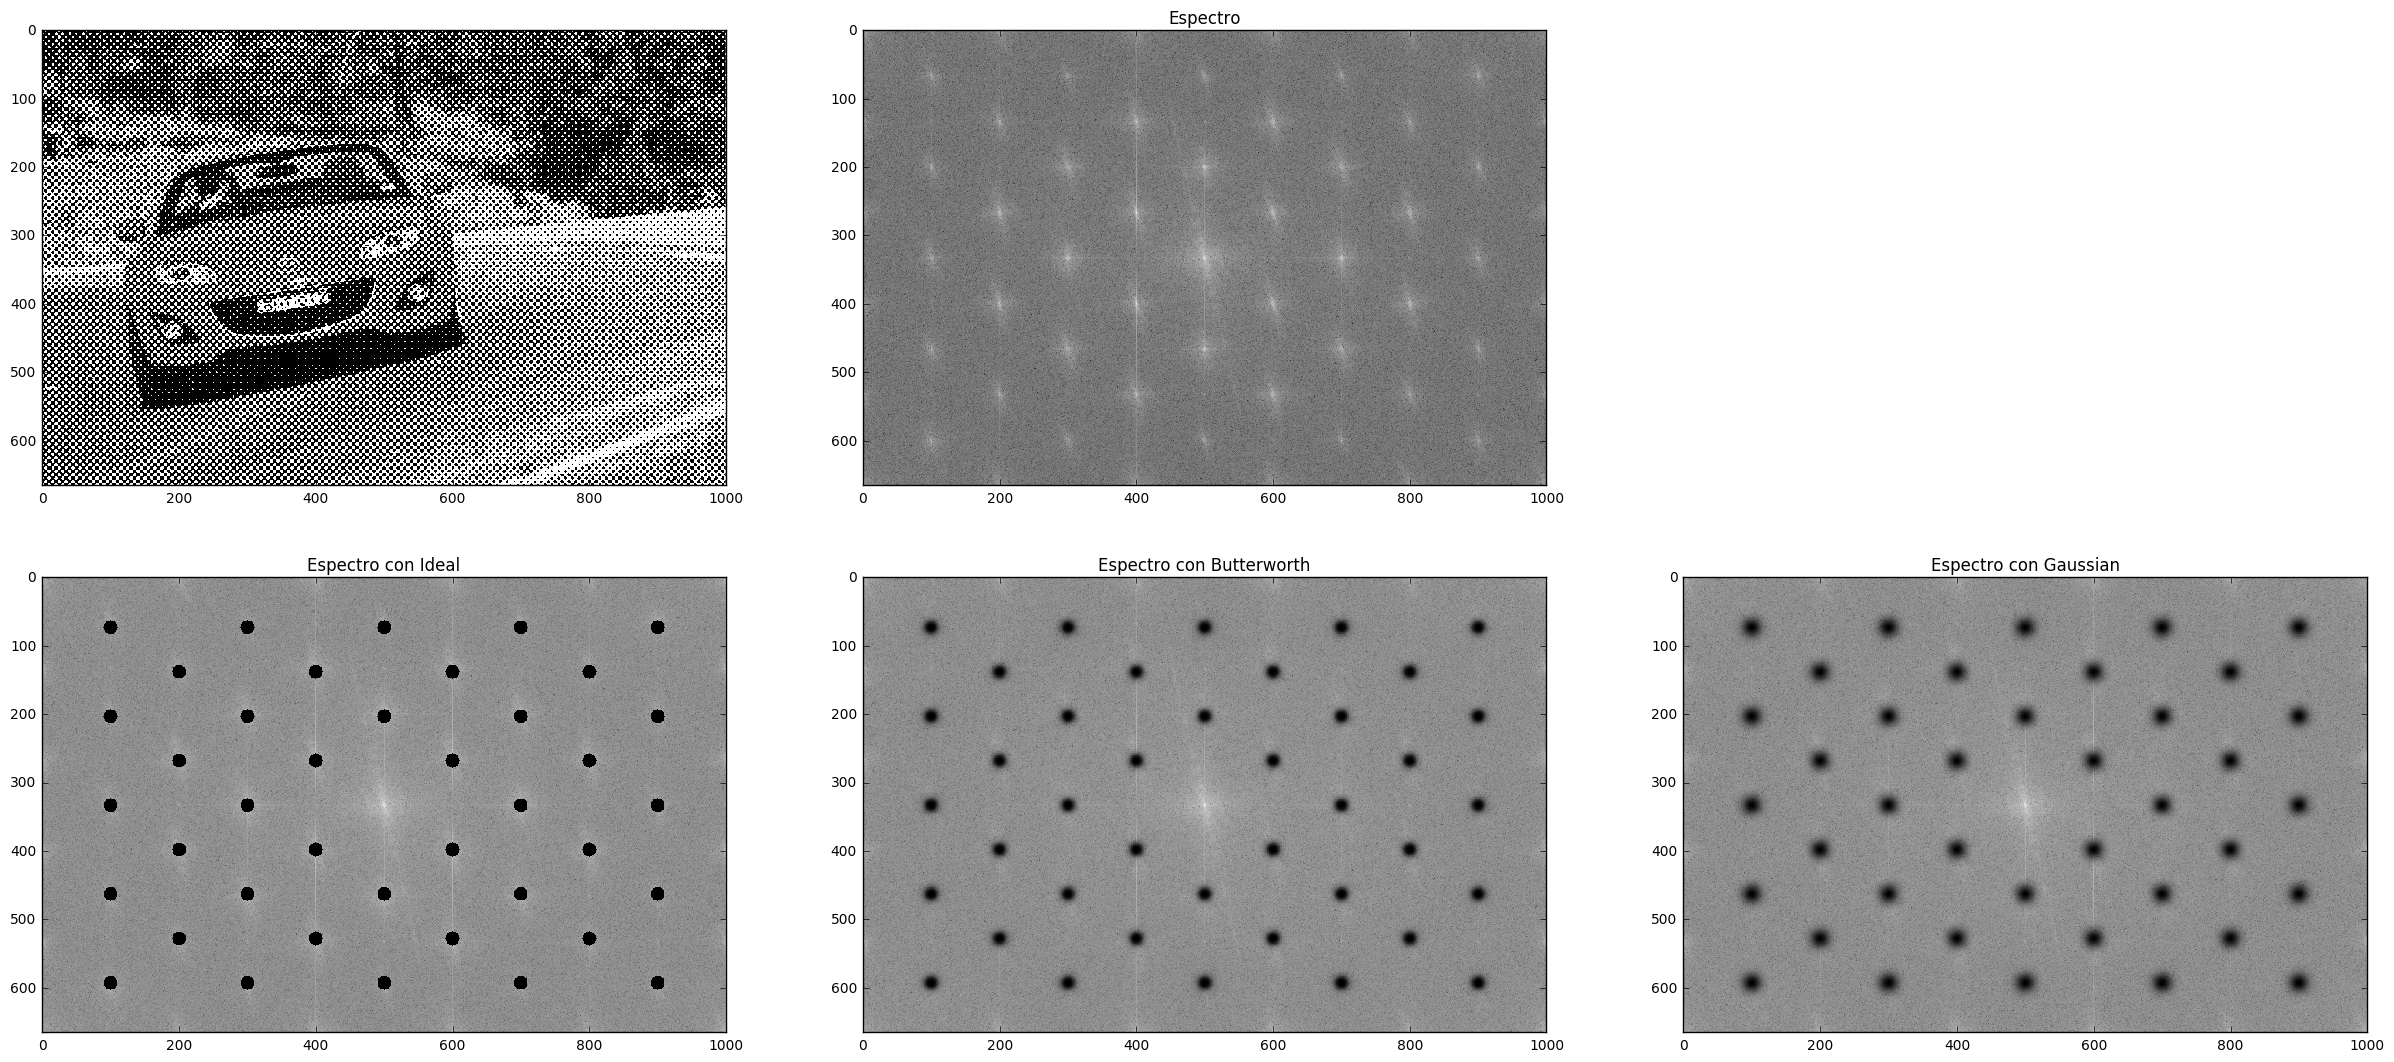

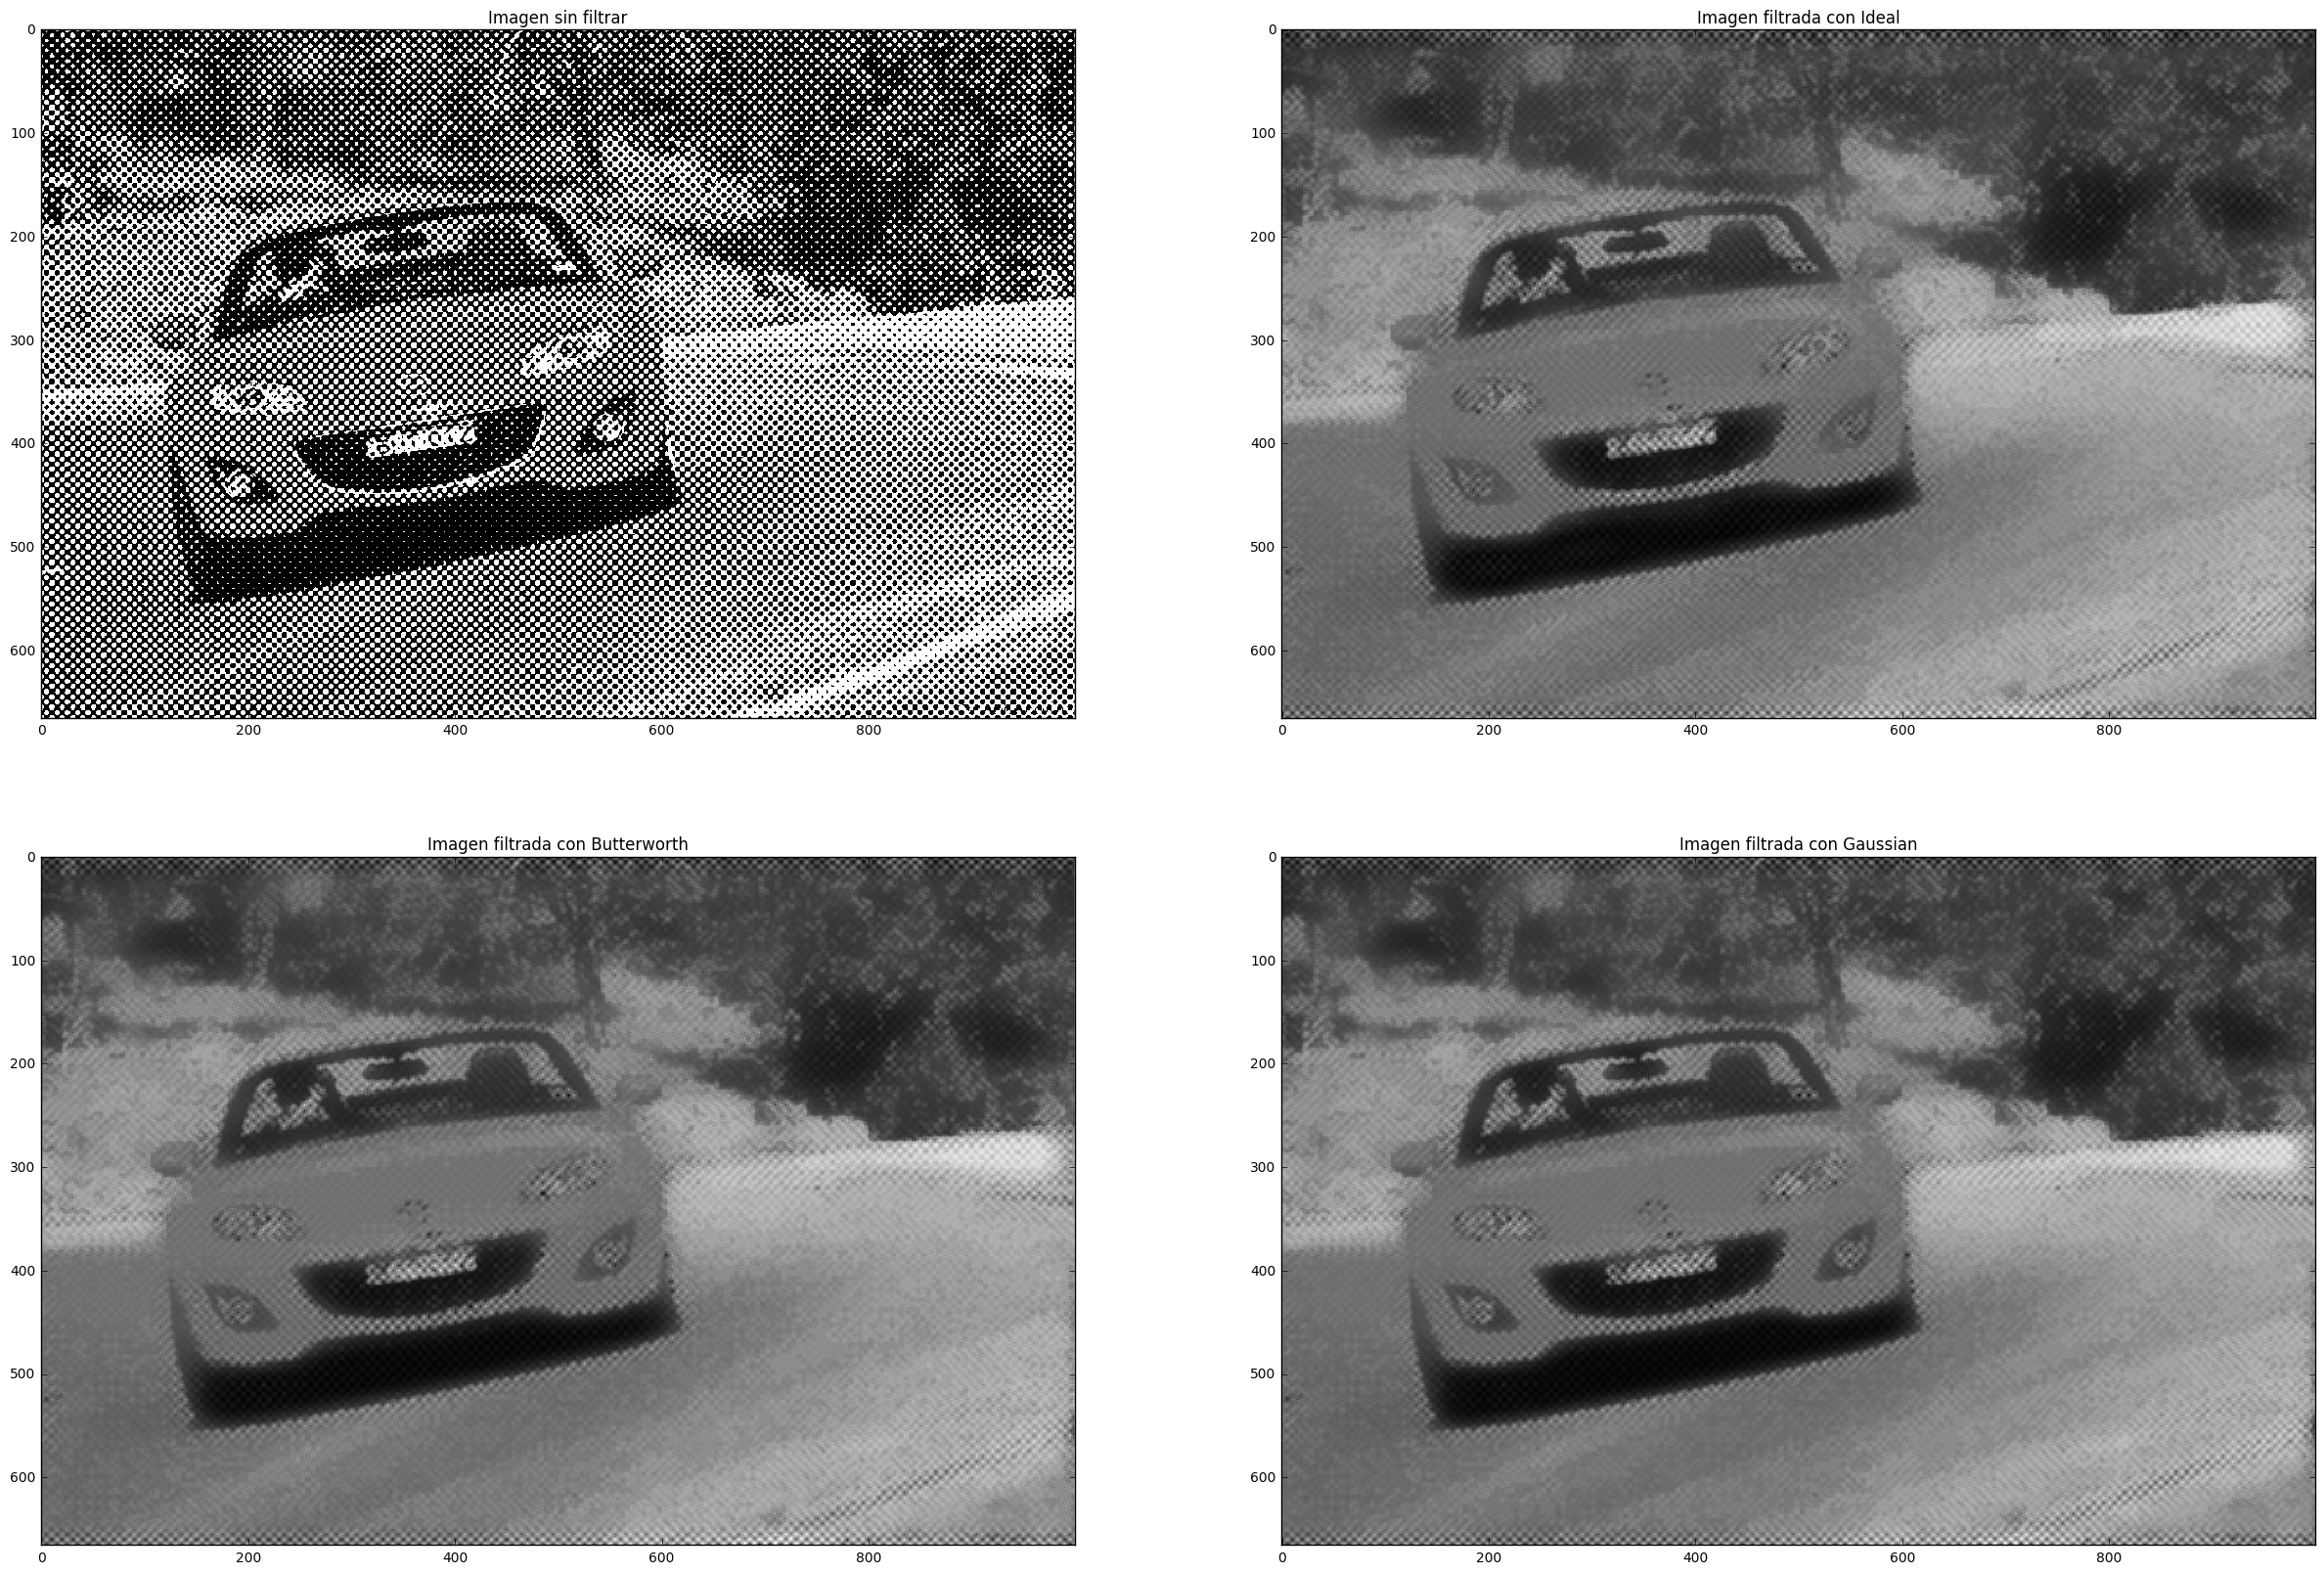

In [8]:
# post-proceso
plt.figure(figsize=(30,20))
plt.subplot(331),plt.imshow(im, cmap='gray', interpolation='none'),
#plt.title('Imagen Original con ruido periódico')
plt.subplot(332),plt.imshow(im_spectrum, cmap='gray', interpolation='none'),
plt.title('Espectro')
plt.subplot(334),plt.imshow(im_spectrum*H[0], cmap='gray', interpolation='none'),
plt.title('Espectro con Ideal')
plt.subplot(335),plt.imshow(im_spectrum*H[1], cmap='gray', interpolation='none'),
plt.title('Espectro con Butterworth')
plt.subplot(336),plt.imshow(im_spectrum*H[2], cmap='gray', interpolation='none'),
plt.title('Espectro con Gaussian')
plt.show()

plt.figure(figsize=(30,20))
plt.subplot(221),plt.imshow(im, cmap='gray', interpolation='none'),
plt.title('Imagen sin filtrar')
plt.subplot(222),plt.imshow(im_with_notch_filter[0], cmap='gray', interpolation='none'),
plt.title('Imagen filtrada con Ideal')
plt.subplot(223),plt.imshow(im_with_notch_filter[1], cmap='gray', interpolation='none'),
plt.title('Imagen filtrada con Butterworth')
plt.subplot(224),plt.imshow(im_with_notch_filter[2], cmap='gray', interpolation='none'),
plt.title('Imagen filtrada con Gaussian')
plt.show()

<h1 style="font-size:200%; background-color:gray; color:white; text-align:center; line-height : 60px;">
Filtro de Wiener </h1>

<ul style="font-size:140%; line-height : 25px;">
  <li> El filtro de Wiener no tiene el problema del filtro inverso con los ceros en la función de degradación, a menos que tanto $H(u,v)$ como $S_{\eta}(u,v)$ sean cero para los mismos valores de u y v.
I La </li> 
  <li> La imagen restaurada en el dominio espacial está dada por la TF inversa de la estimada en el dominio de la frecuencia $\hat{F}(u,v)$. </li>
  <li> Si el ruido es cero, el espectro de potencia del ruido se hace cero y el filtro de Wiener se reduce al filtro inverso.</li>
  <li>Para evaluar el desempeño del Filtro de Wiener, se utilizará una imégen degradada con un kernel de convolución tipo "Motion" y otra con ruido aditivo</li>
  <li> Es considerado como un tipo de ruido multiplicativo a la señal. Por tanto el nivel de intensidad de la celda en la posición (i; j), denotado como y(i; j), se expresarse como: $y(i,j)=y_o(i,j)n(i,j)$, donde $y_o(i,j)$ es el nivel de intensidad que se observaría en esa misma celda en ausencia de ruido speckle y $n(i,j)$ el ruido speckle</li>
</ul>

<h1 style="font-size:100%; background-color:rgba(150, 150, 150, 1.0); color:white; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; J.J. Hernández & J.A. Castillo </h1>

In [18]:
from scipy.signal import gaussian, convolve2d
from skimage import color, data, restoration

# Función para añadir ruido a la imagen 
def blur(img, mode = 'box', block_size = 3):
    # mode = 'box' or 'gaussian' or 'motion'
    dummy = np.copy(img)
    if mode == 'box':
        h = np.ones((block_size, block_size)) / block_size ** 2
    elif mode == 'gaussian':
        h = gaussian(block_size, block_size / 3).reshape(block_size, 1)
        h = np.dot(h, h.transpose())
        h /= np.sum(h)
    elif mode == 'motion':
        h = np.eye(block_size) / block_size
    dummy = convolve2d(dummy, h, mode = 'valid')
    return np.uint8(dummy), h

(<matplotlib.text.Text at 0x7fd30a706c90>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

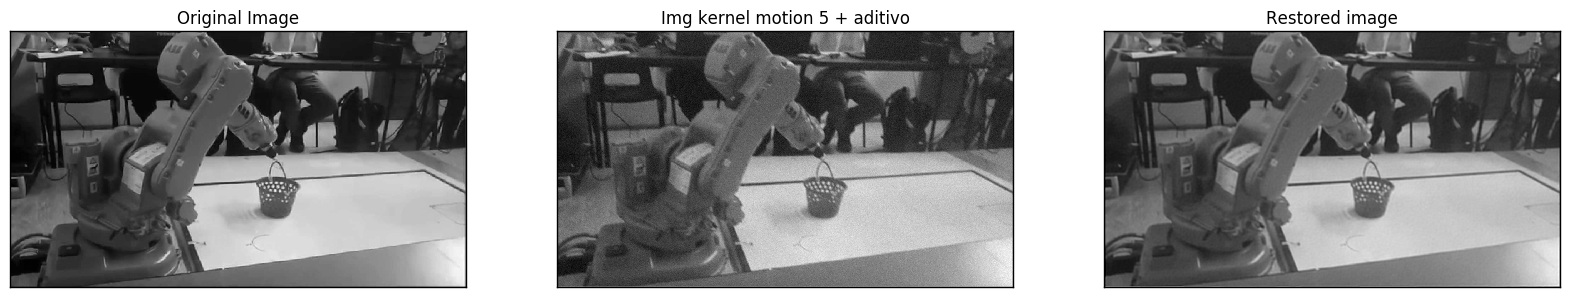

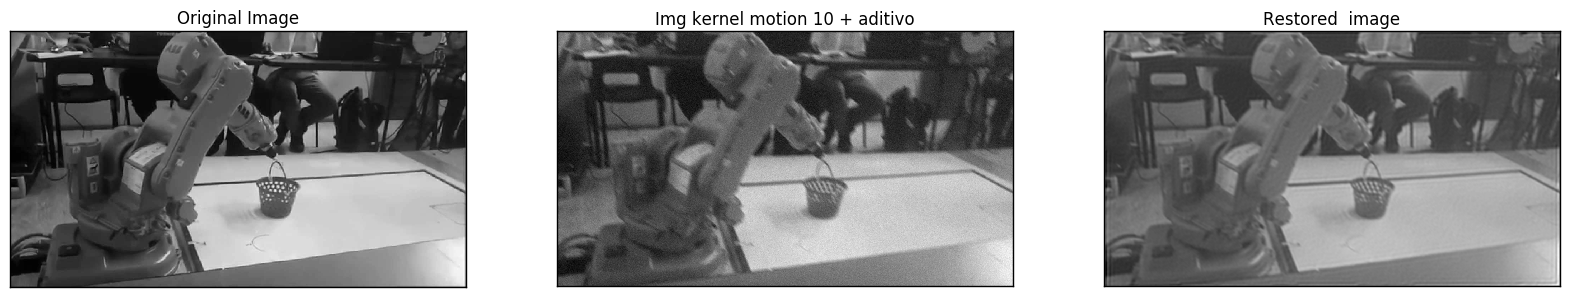

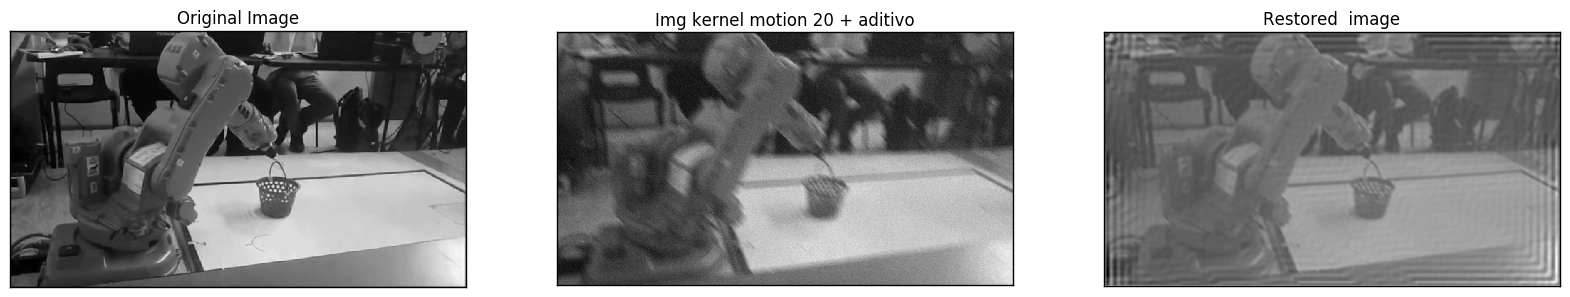

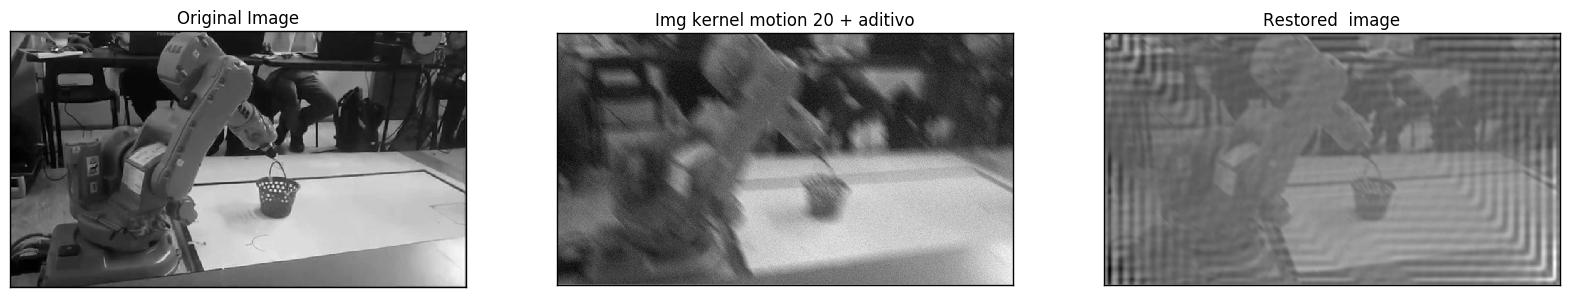

In [19]:
img = cv2.imread(images[0],cv2.IMREAD_GRAYSCALE)

img1, h1 = blur(img, mode = 'motion', block_size=5)
img1 = img1 + 0.1*img1.std()*np.random.standard_normal(img1.shape)
Rest_img1 = restoration.wiener(img1, h1, 1, clip=False)

img2, h2 = blur(img, mode = 'motion', block_size=10)
img2 = img2 + 0.1*img2.std()*np.random.standard_normal(img2.shape)
Rest_img2 = restoration.wiener(img2, h2, 1, clip=False)

img3, h3 = blur(img, mode = 'motion', block_size=20)
img3 = img3 + 0.1*img3.std()*np.random.standard_normal(img3.shape)
Rest_img3 = restoration.wiener(img3, h3, 1, clip=False)

img4, h4 = blur(img, mode = 'motion', block_size=30)
img4 = img4 + 0.1*img4.std()*np.random.standard_normal(img4.shape)
Rest_img4 = restoration.wiener(img4, h4, 1, clip=False)

plt.figure(1,figsize=(20,5))
plt.subplot(131),plt.imshow(img, cmap = 'gray',interpolation='none')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img1, cmap = 'gray',interpolation='none')
plt.title('Img kernel motion 5 + aditivo'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(Rest_img1, cmap = 'gray',interpolation='none')
plt.title('Restored image'), plt.xticks([]), plt.yticks([])

plt.figure(2,figsize=(20,5))
plt.subplot(131),plt.imshow(img, cmap = 'gray',interpolation='none')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img2, cmap = 'gray',interpolation='none')
plt.title('Img kernel motion 10 + aditivo'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(Rest_img2, cmap = 'gray',interpolation='none')
plt.title('Restored  image'), plt.xticks([]), plt.yticks([])

plt.figure(3,figsize=(20,5))
plt.subplot(131),plt.imshow(img, cmap = 'gray',interpolation='none')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img3, cmap = 'gray',interpolation='none')
plt.title('Img kernel motion 20 + aditivo'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(Rest_img3, cmap = 'gray',interpolation='none')
plt.title('Restored  image'), plt.xticks([]), plt.yticks([])

plt.figure(4,figsize=(20,5))
plt.subplot(131),plt.imshow(img, cmap = 'gray',interpolation='none')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img4, cmap = 'gray',interpolation='none')
plt.title('Img kernel motion 20 + aditivo'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(Rest_img4, cmap = 'gray',interpolation='none')
plt.title('Restored  image'), plt.xticks([]), plt.yticks([])